In [ ]:
from pathlib import Path
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon
import cellpose as cp

In [2]:
path = Path(r'C:\Data\Code\MicroscopyPipeline\3pos\pos35') / 'C2_enhanced_short-data_Object Identities_table.h5'
path.exists()

True

In [16]:
columns = ['object_id', 'labelimage_oid', 'timestep', 'Size in pixels', 'Center of the object_0', 'Center of the object_1']
df = pd.read_hdf(path, columns=columns)
#df = df[]
df.head()

C:\Data\Code\venv\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'User Label'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Data\Code\venv\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'Predicted Class'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Data\Code\venv\lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: 'Probability of Label 1'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check

,object_id,timestep,labelimage_oid,User Label,Predicted Class,Probability of Label 1,Probability of Label 2,Bounding Box Maximum_0,Bounding Box Maximum_1,Bounding Box Minimum_0,Bounding Box Minimum_1,Size in pixels,Center of the object_0,Center of the object_1
0,0,0,1,0,Label 1,1.0,0.0,45.0,16.0,23.0,0.0,265.0,33.849056,7.615094
1,1,0,2,0,Label 1,1.0,0.0,101.0,18.0,78.0,0.0,324.0,89.320984,7.101852
2,2,0,3,0,Label 1,1.0,0.0,141.0,19.0,113.0,0.0,393.0,125.847328,8.353689
3,3,0,4,0,Label 1,1.0,0.0,252.0,23.0,213.0,0.0,593.0,233.079254,10.303541
4,4,0,5,0,Label 1,1.0,0.0,293.0,12.0,265.0,0.0,251.0,277.107574,4.498008


timestep
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
12    AxesSubplot(0.125,0.125;0.775x0.755)
13    AxesSubplot(0.125,0.125;0.775x0.755)
14    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

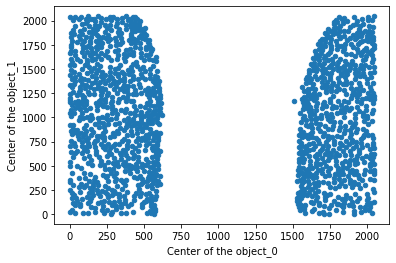

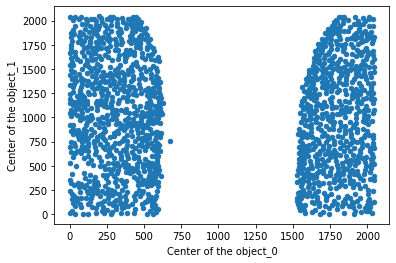

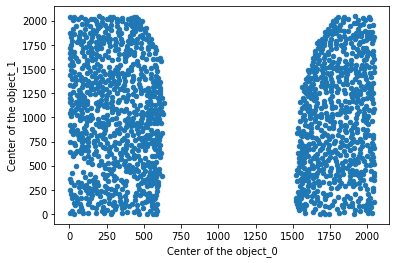

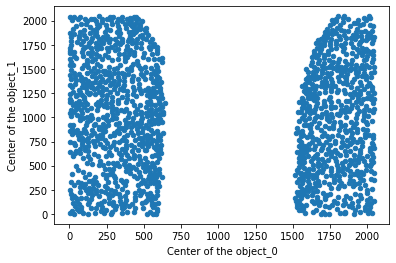

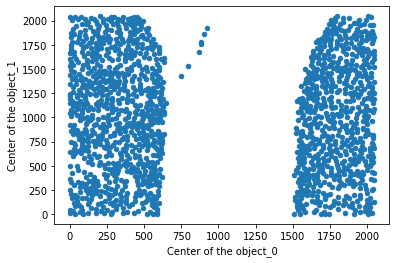

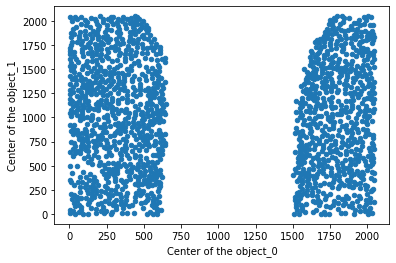

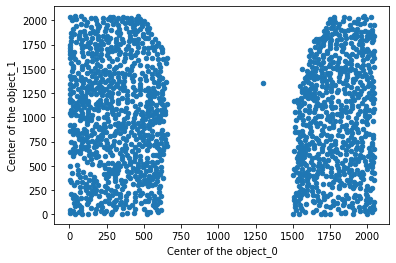

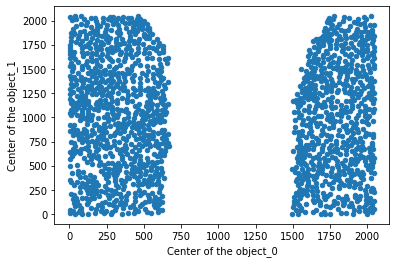

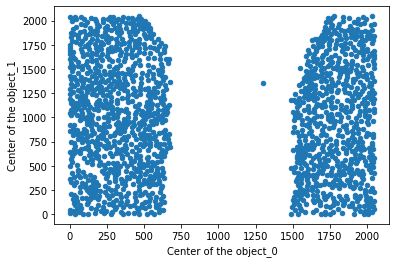

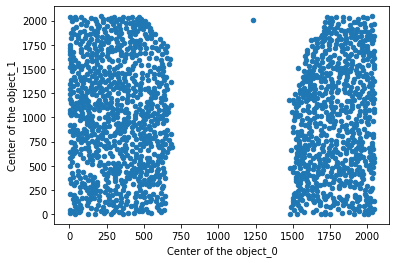

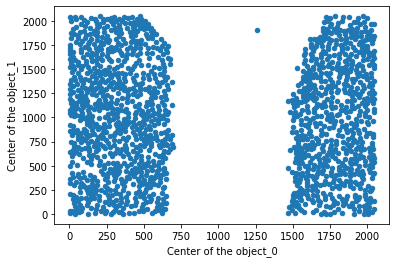

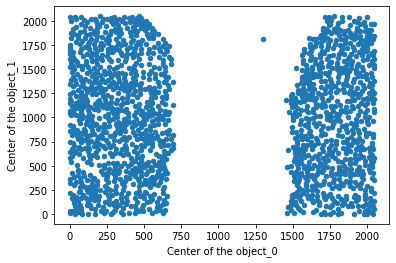

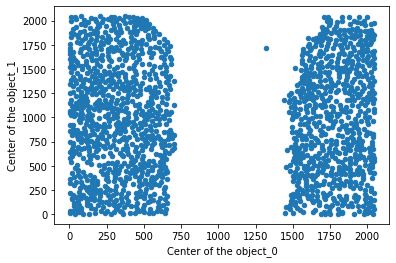

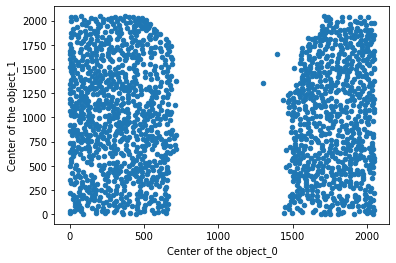

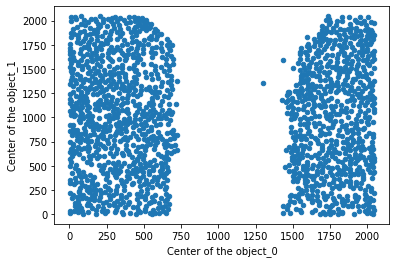

In [17]:
df.groupby('timestep').plot.scatter(x='Center of the object_0', y='Center of the object_1')

In [18]:
df.groupby('timestep').get_group(0)[['Center of the object_0', 'Center of the object_1']]

,Center of the object_0,Center of the object_1
0,33.849056,7.615094
1,89.320984,7.101852
2,125.847328,8.353689
3,233.079254,10.303541
4,277.107574,4.498008
...,...,...
1446,34.593021,2042.720947
1447,126.043480,2044.434814
1448,376.926819,2045.195068
1449,192.949158,2045.457642


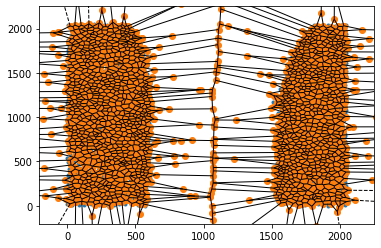

In [19]:
points = df.groupby('timestep').get_group(0)[['Center of the object_0', 'Center of the object_1']]
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)

In [20]:
vor.regions[vor.point_region[0]]

[535, -1, 0, 210, 534]

In [21]:
valid_points = [i for i in vor.point_region  if min(vor.regions[i]) != -1]
valid_regions = [vor.regions[i]  for i in vor.point_region if min(vor.regions[i]) != -1]

In [22]:
valid_regions[0]

[1798, 535, 534, 1794]

In [23]:
subdf = df.groupby('timestep').get_group(0).copy()
subdf['region'] = [vor.regions[i] for i in vor.point_region]
subdf['valid_region'] = [True if min(l) != -1 else False for l in subdf.region]
subdf.head()

,object_id,timestep,labelimage_oid,User Label,Predicted Class,Probability of Label 1,Probability of Label 2,Bounding Box Maximum_0,Bounding Box Maximum_1,Bounding Box Minimum_0,Bounding Box Minimum_1,Size in pixels,Center of the object_0,Center of the object_1,region,valid_region
0,0,0,1,0,Label 1,1.0,0.0,45.0,16.0,23.0,0.0,265.0,33.849056,7.615094,"[535, -1, 0, 210, 534]",False
1,1,0,2,0,Label 1,1.0,0.0,101.0,18.0,78.0,0.0,324.0,89.320984,7.101852,"[1798, 535, 534, 1794]",True
2,2,0,3,0,Label 1,1.0,0.0,141.0,19.0,113.0,0.0,393.0,125.847328,8.353689,"[1799, 1797, 1796, 1795, 1794, 1798]",True
3,3,0,4,0,Label 1,1.0,0.0,252.0,23.0,213.0,0.0,593.0,233.079254,10.303541,"[1799, 1071, 1073, 1072, 1797]",True
4,4,0,5,0,Label 1,1.0,0.0,293.0,12.0,265.0,0.0,251.0,277.107574,4.498008,"[2305, 1071, 1799, 1798, 535, -1, 1058, 2303]",False


In [24]:
#subdf = subdf.query('valid_region')

In [25]:
subdf['coordinates'] = [vor.vertices[i] for i in subdf.region]
subdf.head()

,object_id,timestep,labelimage_oid,User Label,Predicted Class,Probability of Label 1,Probability of Label 2,Bounding Box Maximum_0,Bounding Box Maximum_1,Bounding Box Minimum_0,Bounding Box Minimum_1,Size in pixels,Center of the object_0,Center of the object_1,region,valid_region,coordinates
0,0,0,1,0,Label 1,1.0,0.0,45.0,16.0,23.0,0.0,265.0,33.849056,7.615094,"[535, -1, 0, 210, 534]",False,"[[-182.37362971921902, -26360.027898374323], [..."
1,1,0,2,0,Label 1,1.0,0.0,101.0,18.0,78.0,0.0,324.0,89.320984,7.101852,"[1798, 535, 534, 1794]",True,"[[161.448397879465, -1563.9332719292586], [-18..."
2,2,0,3,0,Label 1,1.0,0.0,141.0,19.0,113.0,0.0,393.0,125.847328,8.353689,"[1799, 1797, 1796, 1795, 1794, 1798]",True,"[[188.65963328316207, -496.42335060113635], [1..."
3,3,0,4,0,Label 1,1.0,0.0,252.0,23.0,213.0,0.0,593.0,233.079254,10.303541,"[1799, 1071, 1073, 1072, 1797]",True,"[[188.65963328316207, -496.42335060113635], [2..."
4,4,0,5,0,Label 1,1.0,0.0,293.0,12.0,265.0,0.0,251.0,277.107574,4.498008,"[2305, 1071, 1799, 1798, 535, -1, 1058, 2303]",False,"[[264.9689350616553, 24.09798926965936], [256...."


In [27]:
subdf['perimeter'] = [float(Polygon(coords).length) for coords in subdf.coordinates]
subdf['area'] = [float(Polygon(coords).area) for coords in subdf.coordinates]

<AxesSubplot:>

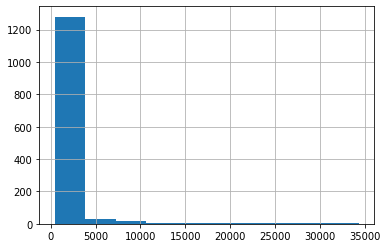

In [28]:
valid_points = subdf.query('valid_region')
valid_points.query('area < area.quantile(.95)').area.hist()

<AxesSubplot:>

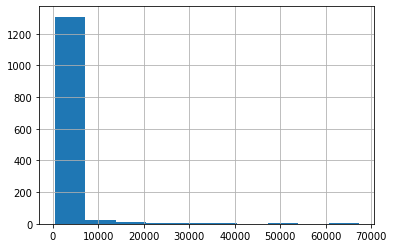

In [29]:
valid_points.query('perimeter < perimeter.quantile(.95)').area.hist()

In [37]:
cols = ['object_id', 'timestep', 'labelimage_oid', 'Center of the object_0', 'Center of the object_1', 'area', 'perimeter' ]
relevant_columns_df = subdf[cols].copy()
relevant_columns_df.rename(columns={'object_id':'global_oid', 
                            'labelimage_oid':'image_oid',
                            'Center of the object_0': 'center_x',
                            'Center of the object_1': 'center_y'}, inplace=True)
relevant_columns_df.head()

,global_oid,timestep,image_oid,center_x,center_y,area,perimeter
0,0,0,1,33.849056,7.615094,2.174100e+07,55748.759884
1,1,0,2,89.320984,7.101852,1.546041e+06,52858.302929
2,2,0,3,125.847328,8.353689,6.798767e+04,3261.657458
3,3,0,4,233.079254,10.303541,1.858793e+04,1092.817938
4,4,0,5,277.107574,4.498008,1.921010e+07,57153.629427


In [38]:
relevant_columns_df.to_csv('initial_voronoi_area_perimeter.csv')